In [2]:
import glob
import matplotlib.pyplot as plt
import cv2
import random

# Dataset Analysis

In [103]:
all_img_files = glob.glob("dataset/*/*.jpg")

dataset_paths = {
    "Airport": [],
    "Bridge": [],
    "Center": [],
    "Desert": [],
    "Forest": [],
    "Industrial": [],
    "Mountain": [],
    "Pond": [],
    "Port": [],
    "Stadium": []
}

In [104]:
len(all_img_files)

3350

In [4]:
for file_name in all_img_files: 
    location = file_name.split("/")[1]
    if location in dataset_paths:
        dataset_paths[location].append(file_name)

### Dataset distribution

Text(0.5, 1.0, 'Number of images per class')

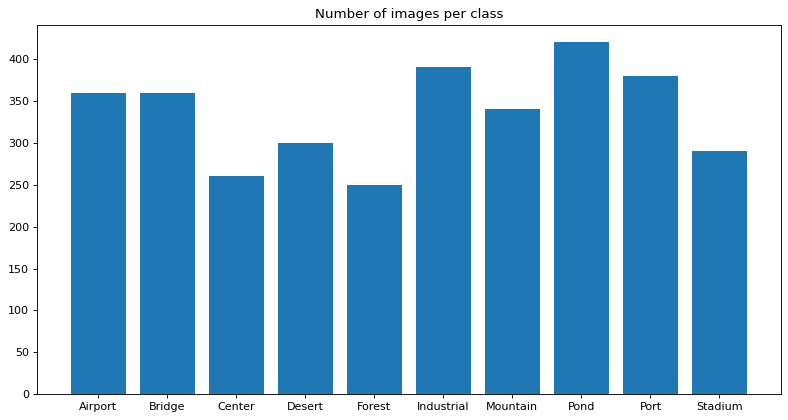

In [5]:
labels = list(dataset_paths.keys())
values = [len(dataset_paths[l]) for l in labels]

from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

plt.bar(labels, values)
plt.title("Number of images per class")

In [6]:
print(f"Number of images of Center: {len(dataset_paths['Center'])}")
print(f"Number of images of Forest: {len(dataset_paths['Forest'])}")

Number of images of Center: 260
Number of images of Forest: 250


### Image Grid

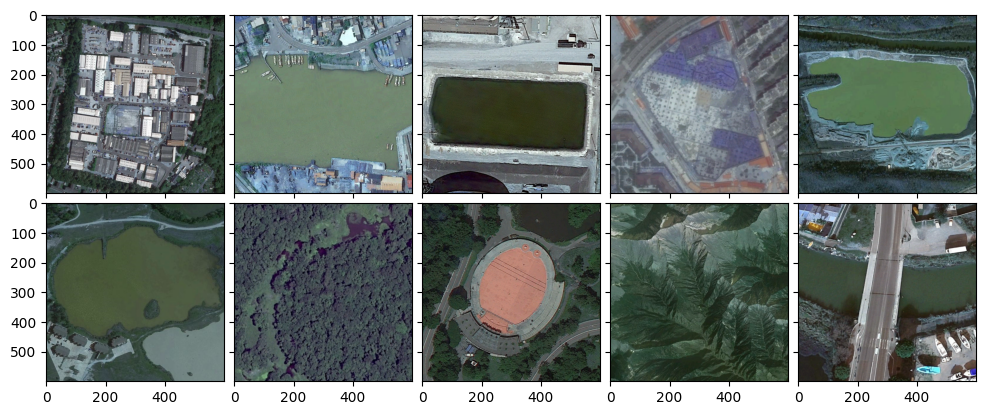

In [7]:
from mpl_toolkits.axes_grid1 import ImageGrid

n_list = random.sample(range(0, len(all_img_files) + 1), 10)

img_list = []

for n in n_list:
    im = cv2.imread(all_img_files[n])
    img_list.append(im)

fig = plt.figure(figsize=(12., 8.))

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 5),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, img_list):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

### Image Quality Analysis

In this section I will mainly:
- look at whether the images are blured by applying Laplacian method
- analyse the brightness & contrast by calculating the mean pixel values to see if some images are too dark or too bright
- and will perform pixel intensity analysis to see if some classes are skewed towards specific color.


##### **1. Blured images**

In [55]:
from imutils import paths

def get_is_blury(image, threshold = 100):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(gray, cv2.CV_64F).var()

    return fm

In [56]:
are_blury = 0
not_blury = 0

fms = []
for img_path in all_img_files:

    img = cv2.imread(img_path)
    is_img_blury = get_is_blury(img)

    fms.append(is_img_blury)

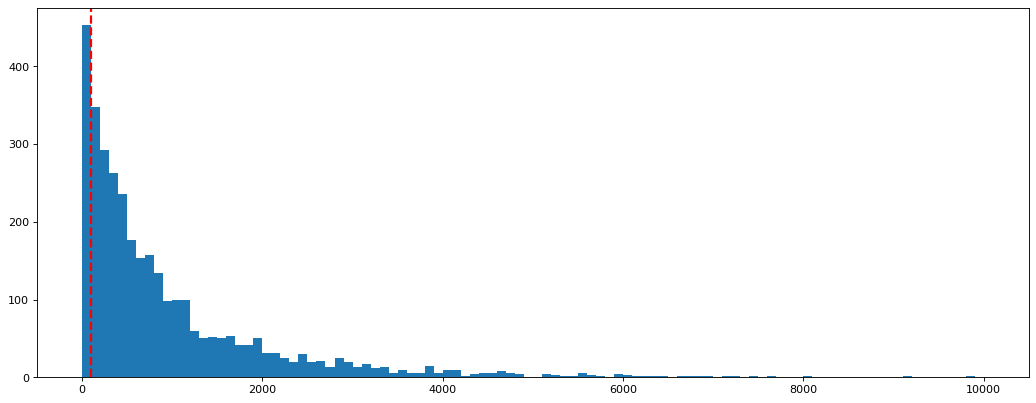

In [83]:
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=80)

plt.hist(fms, bins=100, range = (0, 10000))
plt.axvline(x=100, color='red', linestyle='--', linewidth=2)

In [98]:
def display_blury_imgs(all_img_files, min_t, max_t, title):

    imgs = []

    for path in all_img_files:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        fm = cv2.Laplacian(gray, cv2.CV_64F).var()

        if (fm > min_t and fm < max_t):

            imgs.append(img)


        if len(imgs) == 6:
            break

    fig = plt.figure(figsize=(12., 8.))

    fig.suptitle(title, fontsize=16)


    grid = ImageGrid(fig, 111, 
                    nrows_ncols=(2, 3),  
                    axes_pad=0.1,  
                    )

    for ax, im in zip(grid, imgs):
        ax.imshow(im)


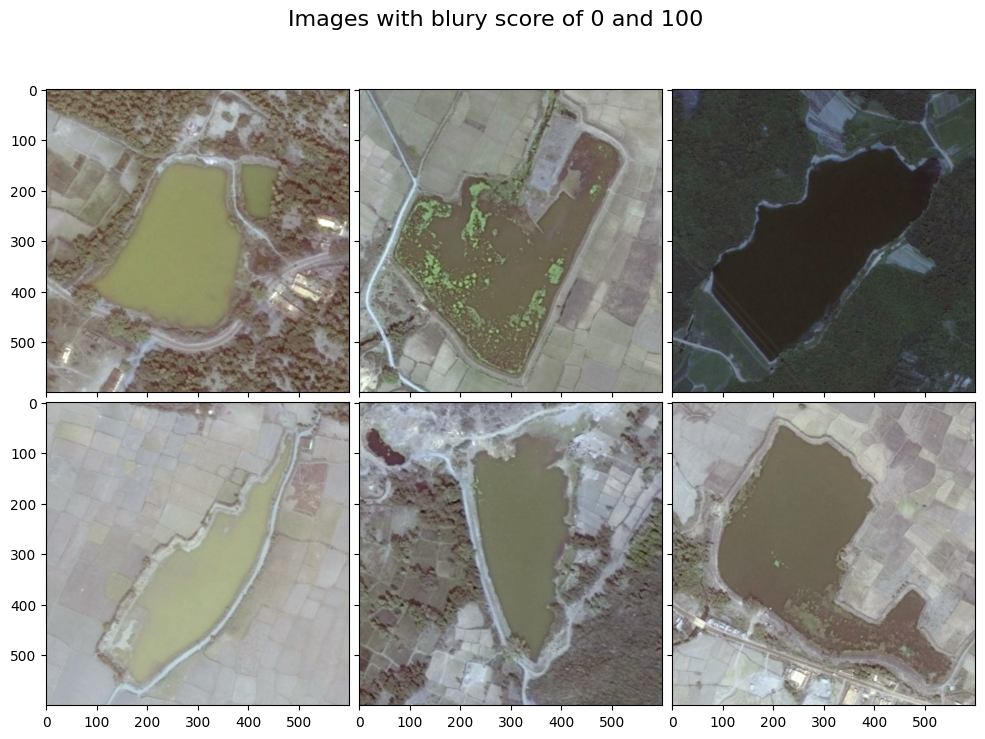

In [100]:
display_blury_imgs(all_img_files, 0, 100, title = f"Images with blury score of 0 and 100")

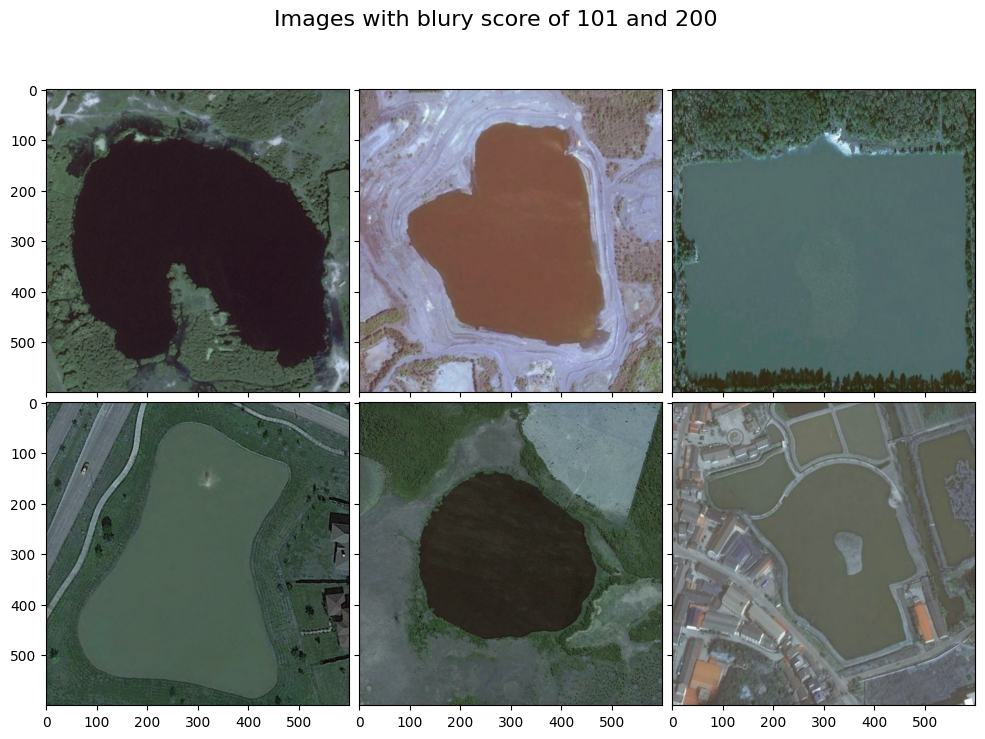

In [101]:
display_blury_imgs(all_img_files, 101, 200, title = f"Images with blury score of 101 and 200")

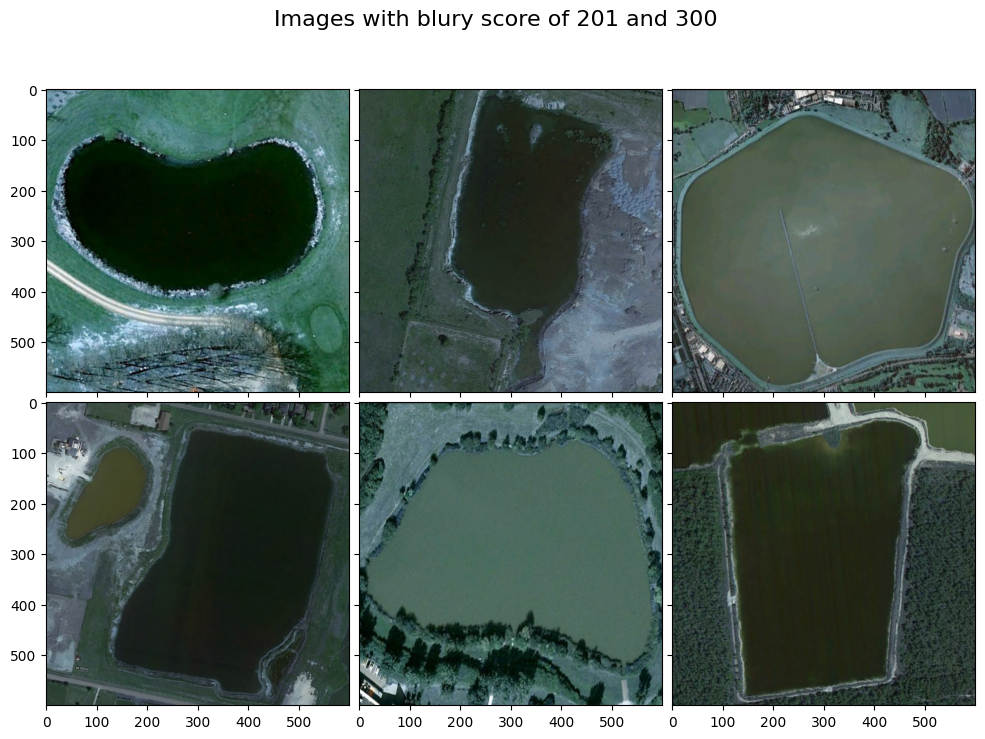

In [102]:
display_blury_imgs(all_img_files, 201, 300, title = f"Images with blury score of 201 and 300")